<a href="https://colab.research.google.com/github/bonsnv/Machine-Learning/blob/main/Tugas_Machine_Learning_Klasifikasi_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
import pandas as pd
import numpy as py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/bonsnv/Machine-Learning/refs/heads/main/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Preprocessing Data

## Data Exploration

### Pengecekan Missing Value

In [ ]:
# Mengecek missing values pada dataset
missing_values = df.isnull().sum()
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Berdasarkan hasil output di atas, terlihat bahwa tidak ada data yang hilang (missing)

### Pengecekan Tipe Data

In [ ]:
data_types = df.dtypes
data_types

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


Untuk tipe data dalam dataset memiliki bentuk int64 terkecuali "oldpeak" yang memiliki bentuk float64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Normalisasi Data dan Encoding

In [ ]:
# Mengidentifikasi fitur kategorical dan numerik
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Fitur kategorikal didefinisikan dalam daftar categorical_features, yang mencakup kolom seperti sex, cp, fbs, restecg, exang, slope, ca, dan thal. Sementara itu, fitur numerik didefinisikan dalam daftar numerical_features, yang mencakup kolom age, trestbps, chol, thalach, dan oldpeak.  S

In [ ]:
# One-Hot Encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

Selanjutnya, melakukan One-Hot Encoding pada fitur kategorikal menggunakan fungsi pd.get_dummies(), yang mengubah variabel kategorikal menjadi format yang dapat digunakan dalam model machine learning dengan membuat kolom biner untuk setiap kategori.

In [ ]:
# Standarisasi fitur numerik
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

Setelah itu, fitur numerik distandarisasi menggunakan StandardScaler dari pustaka sklearn.preprocessing, yang mengubah nilai-nilai fitur numerik agar memiliki rata-rata 0 dan standar deviasi 1, sehingga memudahkan model dalam memproses data.



In [ ]:
df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


##Splitting Dataset

In [ ]:
# Pisahkan fitur dan label
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [ ]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan dimensi data hasil split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 22), (205, 22), (820,), (205,))

Pada proses ini dataset dibagi menjadi menjadi data pelatihan (training) dan data pengujian (testing). Dari 20% dari total data akan digunakan sebagai data pengujian, sementara sisanya, yaitu 80%, akan digunakan untuk pelatihan model. Pada code X_train.shape menunjukkan bahwa terdapat 820 sampel dengan 22 fitur dalam data pelatihan, sedangkan X_test.shape menunjukkan bahwa terdapat 205 sampel dengan 22 fitur dalam data pengujian. Untuk label target, y_train.shape menunjukkan 820 sampel, dan y_test.shape menunjukkan 205 sampel, yang menunjukkan bahwa pembagian data telah dilakukan dengan benar dan sesuai dengan proporsi yang ditentukan.

# Implementasi Model

## Model 1: Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Model 2: Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluasi Model

In [ ]:
print("=== Performa Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

=== Performa Random Forest ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[100   0]
 [  0 105]]
ROC AUC Score: 1.0


Hasil output di atas menunjukkan hasil evaluasi model Random Forest. Model Random Forest memiliki nilai akurasi sebesar 1.0 yang menunjukkan bahwa model berhasil mengklasifikasikan semua sampel dengan benar. Dalam hasil tersebut, kedua kelas (0 dan 1) memiliki nilai precision, recall, dan f1-score yang sempurna (1.00), yang menunjukkan bahwa model tidak hanya akurat, tetapi juga sangat efektif dalam mengidentifikasi kedua kelas tanpa kesalahan. Hasil evaluasi ini menunjukkan bahwa model Random Forest yang digunakan efektif dan berhasil mencapai performa yang sempurna pada dataset pengujian.

In [ ]:
print("=== Performa Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

=== Performa Logistic Regression ===
Accuracy: 0.8731707317073171
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Confusion Matrix:
 [[84 16]
 [10 95]]
ROC AUC Score: 0.8723809523809523


Hasil output di atas menunjukkan hasil evaluasi model Logistic Regression. Model Logistic Regression memiliki nilai akurasi sebesar 0.87 yang menunjukkan bahwa model ini mampu mengklasifikasikan data dengan benar sebanyak 87%. Untuk kelas 0, model memiliki precision sebesar 0.89, yang berarti 89% dari prediksi kelas 0 adalah benar, dan recall sebesar 0.84, menunjukkan bahwa model berhasil mengidentifikasi 84% dari semua sampel kelas 0 yang sebenarnya. Sementara itu, untuk kelas 1, precision adalah 0.86 dan recall adalah 0.90, yang menunjukkan bahwa model cukup efektif dalam mengidentifikasi kelas ini, dengan 90% dari sampel kelas 1 yang benar-benar terdeteksi. Nilai f1-score untuk kedua kelas juga menunjukkan kinerja yang seimbang, masing-masing 0.87 untuk kelas 0 dan 0.88 untuk kelas 1.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

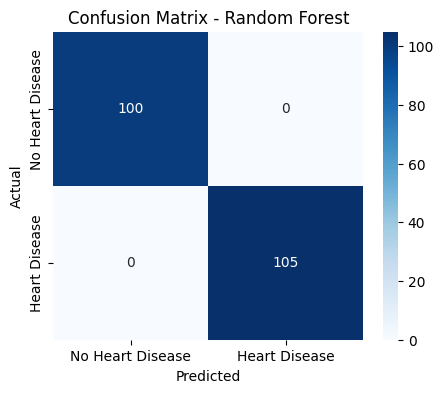

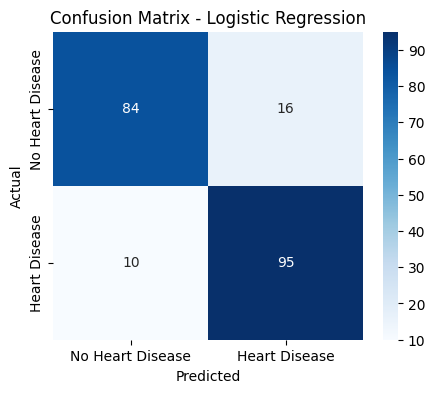

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_confusion_matrix(y_test, y_pred_lr, 'Confusion Matrix - Logistic Regression')


Berdasarkan gambar dapat dilihat bahwa model Random Forest berhasil mengklasifikasikan seluruh data uji dengan akurasi yang sempurna. Model berhasil mengklasifikasikan seluruh data uji dengan benar. Sebanyak 100 data diklasifikasikan sebagai "tidak memiliki penyakit jantung" dan benar sesuai dengan data aktual (true negative), sementara 105 data lainnya diklasifikasikan sebagai "memiliki penyakit jantung" dan juga sesuai dengan label sebenarnya (true positive). Tidak terdapat kesalahan klasifikasi sama sekali, yang ditunjukkan dengan nilai 0 pada kategori false positive maupun false negative.
Dengan demikian, semua prediksi yang dilakukan oleh model sesuai dengan label aktual. Hasil evaluasi menunjukkan bahwa model Random Forest memiliki performa yang sangat baik dalam mendeteksi keberadaan penyakit jantung, dengan nilai akurasi, presisi, recall, dan F1-score yang sempurna. Hal ini mengindikasikan bahwa model tidak melakukan kesalahan klasifikasi sama sekali pada data uji.


Berdasarkan visualisasi confusion matrix tersebut, diketahui bahwa model memprediksi sebanyak 84 pasien yang tidak memiliki penyakit jantung secara benar (true negative) dan 95 pasien yang benar-benar memiliki penyakit jantung juga diklasifikasikan dengan benar (true positive). Namun, model juga menghasilkan 16 kesalahan klasifikasi positif palsu (false positive), yaitu ketika pasien sebenarnya tidak memiliki penyakit jantung namun diprediksi memilikinya. Selain itu, terdapat 10 kesalahan negatif palsu (false negative), yaitu ketika pasien sebenarnya memiliki penyakit jantung tetapi diprediksi tidak memilikinya oleh model.
Dari hasil tersebut, metrik evaluasi utama model dapat dihitung sebagai berikut. Nilai akurasi model sebesar sekitar 87,32%, yang menunjukkan bahwa model mampu mengklasifikasikan sebagian besar data dengan tepat. Nilai presisi mencapai sekitar 85,59%, yang berarti dari seluruh prediksi penyakit jantung yang dibuat oleh model, sekitar 85% di antaranya benar. Sementara itu, recall atau sensitivitas model adalah 90,48%, menunjukkan bahwa model cukup efektif dalam mendeteksi kasus penyakit jantung. Nilai F1-score yang dihasilkan adalah sekitar 87,96%, mencerminkan keseimbangan yang baik antara presisi dan recall.


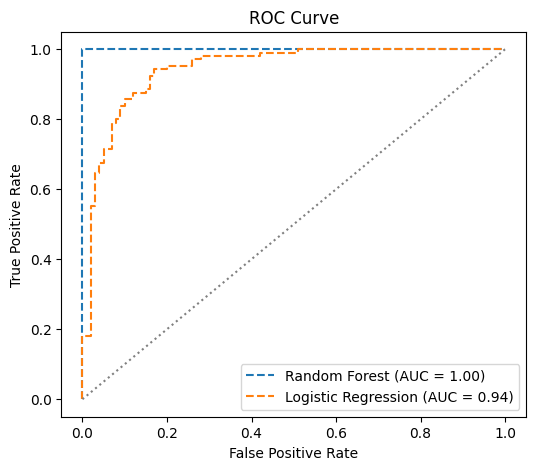

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])

rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])  # Calculate AUC for Random Forest
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])  # Calculate AUC for Logistic Regression

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})", linestyle='--')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Pada gambar tersebut, terlihat bahwa model Random Forest menghasilkan kurva ROC yang hampir sempurna, membentuk sudut tajam di kiri atas, dengan nilai AUC (Area Under the Curve) sebesar 1.00. Hal ini menunjukkan bahwa model ini memiliki kemampuan klasifikasi yang sangat baik dan tidak menghasilkan kesalahan dalam membedakan antara pasien yang memiliki dan tidak memiliki penyakit jantung pada dataset uji. Artinya, Random Forest mampu memberikan prediksi yang benar secara konsisten di seluruh ambang batas klasifikasi.

Sementara itu, model Logistic Regression juga menunjukkan performa yang cukup baik dengan kurva ROC yang mendekati kurva Random Forest. Model ini memiliki AUC sebesar 0.94, yang menunjukkan tingkat akurasi klasifikasi yang tinggi. Meskipun tidak seoptimal Random Forest, Logistic Regression masih mampu membedakan kedua kelas secara efektif dan menunjukkan potensi yang kuat sebagai model prediksi.

Nilai AUC yang tinggi pada kedua model mengindikasikan bahwa keduanya cocok digunakan dalam sistem deteksi penyakit jantung. Namun, performa Random Forest yang sempurna berdasarkan nilai AUC menjadikannya model yang lebih unggul dalam konteks ini. Dengan demikian, model ini lebih direkomendasikan jika tujuan utama adalah memaksimalkan akurasi dan meminimalkan risiko kesalahan klasifikasi dalam diagnosis penyakit jantung.


<ipython-input-44-d38ba97a91a2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


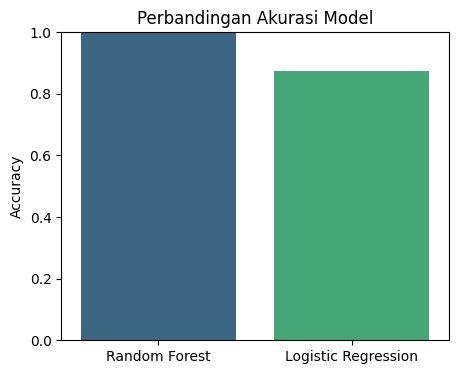

In [ ]:
model_names = ['Random Forest', 'Logistic Regression']

rf_accuracy = accuracy_score(y_test, y_pred_rf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
accuracy_scores = [rf_accuracy, lr_accuracy]

plt.figure(figsize=(5, 4))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.show()

Berdasarkan visualisasi tersebut, model Random Forest menunjukkan tingkat akurasi yang sangat tinggi, yaitu 100%, yang berarti seluruh prediksi pada data uji sesuai dengan label sebenarnya. Ini mencerminkan bahwa model memiliki kinerja yang sangat baik dalam membedakan antara pasien yang memiliki dan yang tidak memiliki penyakit jantung, tanpa menghasilkan kesalahan klasifikasi sama sekali.

Sementara itu, model Logistic Regression memiliki akurasi sebesar 87%, yang meskipun lebih rendah dari Random Forest, tetap tergolong tinggi dan menunjukkan bahwa model ini juga cukup andal dalam melakukan klasifikasi. Perbedaan akurasi ini menunjukkan bahwa Random Forest memiliki keunggulan dalam menangkap pola dan hubungan kompleks antar fitur dalam dataset, terutama karena sifat algoritmanya yang menggunakan banyak pohon keputusan untuk mencapai hasil yang stabil dan presisi tinggi.
